# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [30]:
import tensorflow as tf


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.9.1


# Task 2: The Dataset
### Import MNIST

In [31]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [32]:
print(f"x_train = {x_train.shape}")
print(f"y_train = {y_train.shape}")
print(f"x_test = {x_test.shape}")
print(f"y_test = {y_test.shape}")

x_train = (60000, 28, 28)
y_train = (60000,)
x_test = (10000, 28, 28)
y_test = (10000,)


### Plot an Image Example

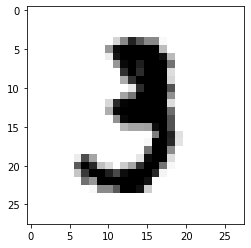

In [33]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10],cmap='binary')
plt.show()

### Display Labels

In [34]:
y_train[10]

3

In [35]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [36]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [37]:
print(f"y_train_encoded  = {y_train_encoded.shape}")
print(f"y_test_encoded = {y_test_encoded.shape}")

y_train_encoded  = (60000, 10)
y_test_encoded = (10000, 10)


### Display Encoded Labels

In [38]:
y_train_encoded[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [39]:
import numpy as np

x_train_reshape = np.reshape(x_train,(60000,784))
x_test_reshape = np.reshape(x_test,(10000,784))

print(f"x_train_reshape = {x_train_reshape.shape}")
print(f"x_ttest_reshape = {x_test_reshape.shape}")

x_train_reshape = (60000, 784)
x_ttest_reshape = (10000, 784)


### Display Pixel Values

In [40]:
print(set(x_train_reshape[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [41]:
x_mean = np.mean(x_train_reshape)
x_std = np.std(x_train_reshape)

epsilon = 1e-10

x_train_norm = (x_train_reshape - x_mean )/ (x_std + epsilon)
x_test_norm = (x_test_reshape - x_mean )/ (x_std + epsilon)

### Display Normalized Pixel Values

In [42]:
print(set(x_train_norm[10]))

{-0.4240738943910262, 1.0778195735660674, 2.3633385588513764, 1.6887592893452241, -0.34770642991863165, 0.8869009123850808, 2.6560805059955555, 2.8088154349403447, 0.4159682148053143, 2.5288013985415647, 2.6051688630139593, 2.681536327486354, 1.7523988430722195, -0.19497150097384247, 2.719720059722551, 2.706992148977152, 0.75962180493109, 2.083324522452596, 2.4015222910875735, 0.4668798577869107, 0.09777044617033681, 1.4342010744372422, 0.7214380726948927, 0.11049835691573591, 0.00867507095254312, 0.505063590023108, 1.8287663075446141, 2.426978112578372, 2.7960875241949457, 2.7579037919587486, -0.10587612575604877, 1.2050986810200583, 1.8669500397808114, 0.89962882313048, -0.41134598364562713, 0.912356733875879, -0.029508661283654175, -0.18224359022844336, 0.2250495536243278, 0.2123216428789287, 0.6068868759863008, 2.210603629906587, 2.2487873621427843, 2.197875719161188, 2.2360594513973853, 2.579713041523161, 0.3014170180967224, -0.33497851917323257, 0.6450706082224981, 0.975996287602

# Task 6: Creating a Model
### Creating the Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [46]:
model.compile(
    optimizer = 'sgd',
      loss='categorical_crossentropy',
    metrics = ['accuracy']

)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [49]:
model.fit(x_train_norm , y_train_encoded,batch_size =32,epochs =10, validation_split=.3,verbose =2)
model.save("model.pkl")

Epoch 1/10
1313/1313 - 2s - loss: 0.0769 - accuracy: 0.9775 - val_loss: 0.1064 - val_accuracy: 0.9693 - 2s/epoch - 2ms/step
Epoch 2/10
1313/1313 - 2s - loss: 0.0680 - accuracy: 0.9805 - val_loss: 0.0994 - val_accuracy: 0.9712 - 2s/epoch - 2ms/step
Epoch 3/10
1313/1313 - 2s - loss: 0.0601 - accuracy: 0.9835 - val_loss: 0.0933 - val_accuracy: 0.9732 - 2s/epoch - 2ms/step
Epoch 4/10
1313/1313 - 2s - loss: 0.0533 - accuracy: 0.9851 - val_loss: 0.0917 - val_accuracy: 0.9728 - 2s/epoch - 2ms/step
Epoch 5/10
1313/1313 - 2s - loss: 0.0475 - accuracy: 0.9873 - val_loss: 0.0907 - val_accuracy: 0.9731 - 2s/epoch - 2ms/step
Epoch 6/10
1313/1313 - 2s - loss: 0.0426 - accuracy: 0.9890 - val_loss: 0.0891 - val_accuracy: 0.9734 - 2s/epoch - 2ms/step
Epoch 7/10
1313/1313 - 2s - loss: 0.0382 - accuracy: 0.9903 - val_loss: 0.0919 - val_accuracy: 0.9724 - 2s/epoch - 2ms/step
Epoch 8/10
1313/1313 - 2s - loss: 0.0343 - accuracy: 0.9915 - val_loss: 0.0891 - val_accuracy: 0.9743 - 2s/epoch - 2ms/step
Epoch 9/

### Evaluating the Model

In [50]:
_,accuracy = model.evaluate(x_test_norm , y_test_encoded)

print("Test Set Accuracy : ",accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9707
Test Set Accuracy :  97.07000255584717


# Task 8: Predictions

### Predictions on Test Set

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score

y_pred = model.predict(x_test_norm)

yt = np.argmax(y_pred,axis = 1)

print(f"Accuracy Score: {accuracy_score( y_test ,yt)}")
print(f"Confusion Matrix: \n {confusion_matrix( y_test, yt)}")
#confusion_matrix( test_labels, yt)
p_score= precision_score(y_test, yt,average='micro')
print(f"Precision:{p_score}")


print(f"Recall: {recall_score(y_test,yt,average='micro')}")

313/313 [==============================] - 0s 859us/step
Accuracy Score: 0.9707
Confusion Matrix: 
 [[ 971    0    1    1    1    1    2    0    2    1]
 [   0 1118    4    1    0    1    2    0    9    0]
 [   5    0 1008    2    2    1    2    5    5    2]
 [   0    0    8  989    0    2    0    3    4    4]
 [   2    1    6    2  937    1    4    2    2   25]
 [   5    1    0   16    1  850    6    1    8    4]
 [   7    2    1    1    4    2  936    0    5    0]
 [   1    6   17    9    1    0    0  970    4   20]
 [   3    0    6    7    1    5    3    2  946    1]
 [   4    2    1    7    4    0    1    2    6  982]]
Precision:0.9707
Recall: 0.9707


### Plotting the Results

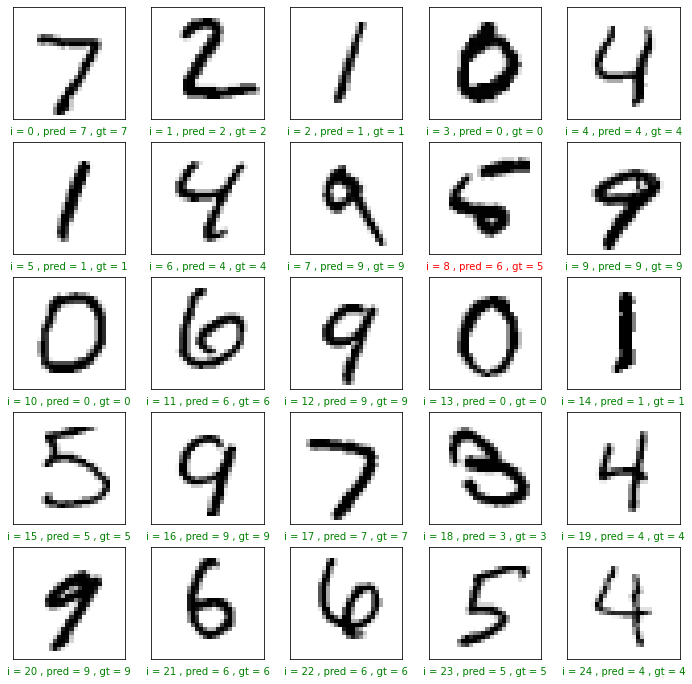

In [69]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(y_pred[start_index +i])
    gt= y_test[start_index+i]
    
    col = 'g'
    
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i = {} , pred = {} , gt = {}'.format(start_index + i, pred,gt),color=col)
    plt.imshow(x_test[start_index + i],cmap='binary')

plt.show()

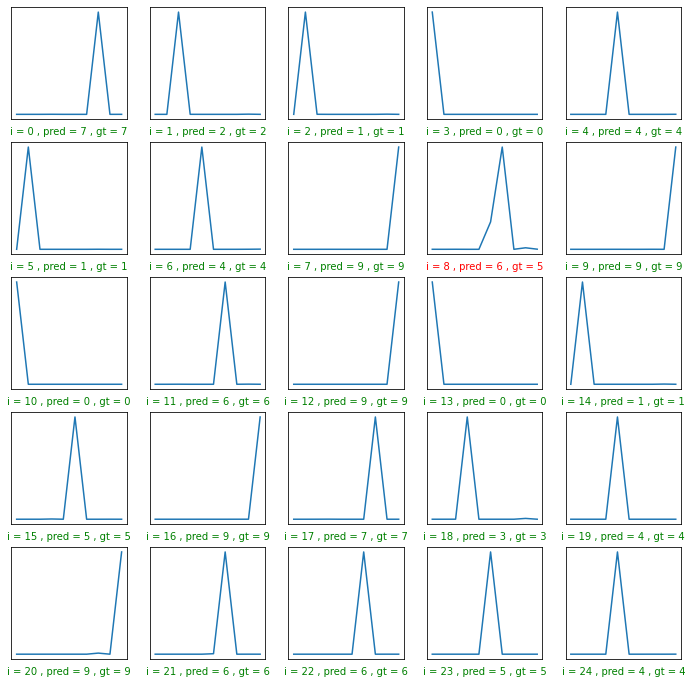

In [76]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    
    pred = np.argmax(y_pred[start_index +i])
    gt= y_test[start_index+i]
    
    plt.plot(y_pred[i])
    col = 'g'
    
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i = {} , pred = {} , gt = {}'.format(start_index + i, pred,gt),color=col)

plt.show()